In [1]:
from multitask_classifier import *

c:\Users\K1191\anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class DotDict(dict):
    def __getattr__(self, key):
        try:
            return self[key]
        except KeyError:
            raise AttributeError(f"'DotDict' object has no attribute '{key}'")

    def __setattr__(self, key, value):
        self[key] = value

In [3]:
TQDM_DISABLE = False

args_dict = {
    "sst_train": "data/ids-sst-train.csv",
    "sst_dev": "data/ids-sst-dev.csv",
    "sst_test": "data/ids-sst-test-student.csv",

    "para_train": "data/quora-train.csv",
    "para_dev": "data/quora-dev.csv",
    "para_test": "data/quora-test-student.csv",

    "sts_train": "data/sts-train.csv",
    "sts_dev": "data/sts-dev.csv",
    "sts_test": "data/sts-test-student.csv",

    "seed": 11711,
    "epochs": 10,
    "option": "finetune",
    "use_gpu": True,  # Default is False, set to True if required

    "sst_dev_out": "predictions/sst-dev-output-combined.csv",
    "sst_test_out": "predictions/sst-test-output-combined.csv",

    "para_dev_out": "predictions/para-dev-output-combined.csv",
    "para_test_out": "predictions/para-test-output-combined.csv",

    "sts_dev_out": "predictions/sts-dev-output-combined.csv",
    "sts_test_out": "predictions/sts-test-output-combined.csv",

    # hyperparameters
    "batch_size": 8,  # 64 for sst, 8 for cfimdb can fit a 12GB GPU
    "hidden_dropout_prob": 0.3,
    "lr": 1e-5  # 1e-3 for pretrain, 1e-5 for fine-tuning
}

args = DotDict(args_dict)

In [4]:
# args = get_args()
args.filepath = f'{args.option}-{args.epochs}-{args.lr}-multitask-combined.pt' # save path
seed_everything(args.seed)  # fix the seed for reproducibility

save_metrics = {
    "batch_size": args.batch_size,
    "lr": args.lr,
    "hidden_dropout_prob": args.hidden_dropout_prob,
    "option": args.option,
    "epoch": [],
    "train_loss": [],
    "train_sentiment_acc": [],
    "train_paraphrase_acc": [],
    "train_sts_corr": [],
    "train_avg_normalized_score": [],
    "test_sentiment_accuracy": [], 
    "test_paraphrase_accuracy": [],
    "test_sts_corr": []
}

train_multitask(args, save_metrics, model_name='combined')
test_model(args, save_metrics)

MULTITASK_combined = "./stats/multitask-combined_saved_metrics.json"

# Save save_metrics to a JSON file
with open(MULTITASK_combined, 'w') as f:
    json.dump(save_metrics, f, indent=4)

print(f'Metrics saved to {MULTITASK_combined}')

========================Loading data========================
Loaded 8544 train examples from data/ids-sst-train.csv
Loaded 141498 train examples from data/quora-train.csv
Loaded 6040 train examples from data/sts-train.csv
Loaded 1101 train examples from data/ids-sst-dev.csv
Loaded 20212 train examples from data/quora-dev.csv
Loaded 863 train examples from data/sts-dev.csv
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
========================Data loaded========================
========================Model Created========================

Device:  cuda
Model Name:  combined
========================Training========================


train-0:  16%|█▌        | 166/1068 [00:15<01:24, 10.64it/s]


KeyboardInterrupt: 

c:\Users\K1191\anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


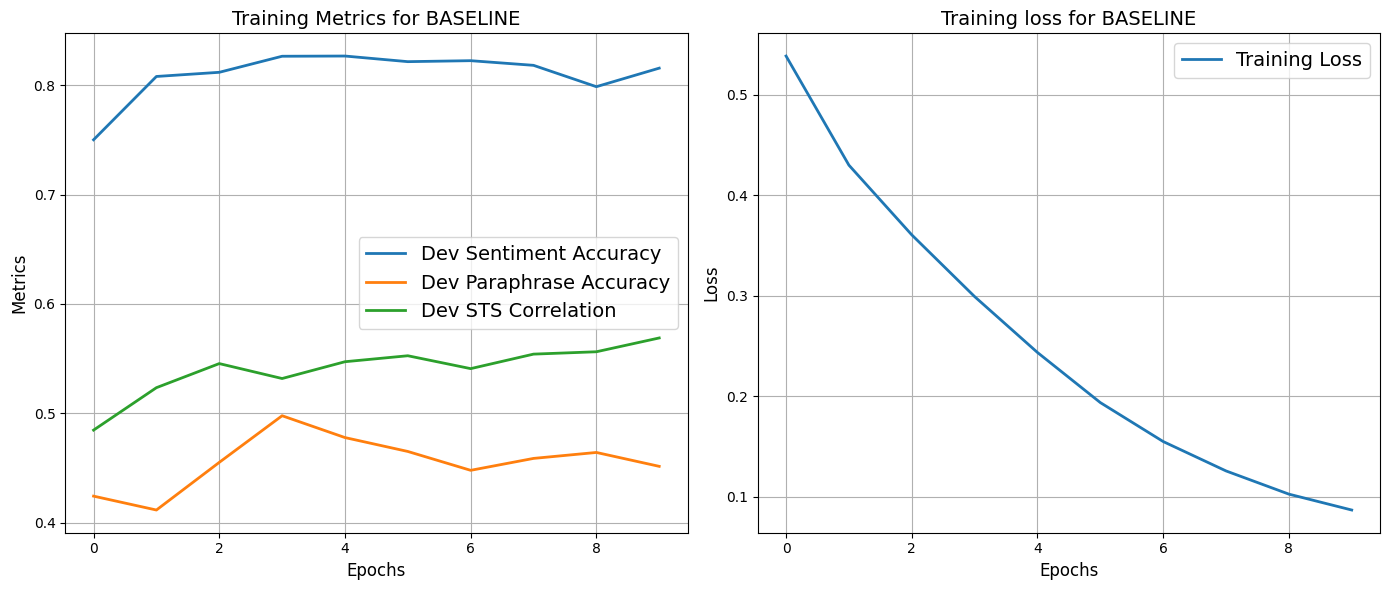

test sentiment accuracy: [0.4977293369663942]
test paraphrase accuracy: [0.8266871165644172]
semantic similarity regression accuracy: [0.5481536959169422]


In [ ]:
from utils import *

MULTITASK_combined = "./stats/multitask-combined_saved_metrics.json"
test_sentiment_accuracy, test_paraphrase_accuracy, test_sts_corr = visualize_multitask(MULTITASK_combined)

print(f"test sentiment accuracy: {test_sentiment_accuracy}")
print(f"test paraphrase accuracy: {test_paraphrase_accuracy}")
print(f"semantic similarity regression accuracy: {test_sts_corr}")

In [1]:
from utils import *
import matplotlib.pyplot as plt

BASE_PATH = "./stats/baseline_metrics.json"
LORA_PATH = "./stats/multitask-LoRA_saved_metrics copy_10.json"
RMS_PATH = "./stats/multitask-RMS_saved_metrics.json"
SWIGLU_PATH = "./stats/multitask-SwiGLU_saved_metrics.json"
COMBINED_PATH = "./stats/multitask-combined_saved_metrics_r64_alpha_256 copy10.json"

c:\ProgramData\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

### BERT baseline
epochs_0, train_loss_0, train_sentiment_acc_0, train_paraphrase_acc_0, train_sts_corr_0, train_avg_0, \
    test_sentiment_accuracy_0, test_paraphrase_accuracy_0, test_sts_corr_0 = load_data_multitask(BASE_PATH)


### BERT + LoRA 
epochs_1, train_loss_1, train_sentiment_acc_1, train_paraphrase_acc_1, train_sts_corr_1, train_avg_1, \
    test_sentiment_accuracy_1, test_paraphrase_accuracy_1, test_sts_corr_1 = load_data_multitask(LORA_PATH)


### BERT + RMS
epochs_2, train_loss_2, train_sentiment_acc_2, train_paraphrase_acc_2, train_sts_corr_2, train_avg_2, \
    test_sentiment_accuracy_2, test_paraphrase_accuracy_2, test_sts_corr_2 = load_data_multitask(RMS_PATH)
    

### BERT + SwiGLU
epochs_3, train_loss_3, train_sentiment_acc_3, train_paraphrase_acc_3, train_sts_corr_3, train_avg_3, \
    test_sentiment_accuracy_3, test_paraphrase_accuracy_3, test_sts_corr_3 = load_data_multitask(SWIGLU_PATH)


### BERT + LoRA + RMS + SwiGLU
epochs_4, train_loss_4, train_sentiment_acc_4, train_paraphrase_acc_4, train_sts_corr_4, train_avg_4, \
    test_sentiment_accuracy_4, test_paraphrase_accuracy_4, test_sts_corr_4 = load_data_multitask(COMBINED_PATH)

#### Plot the loss

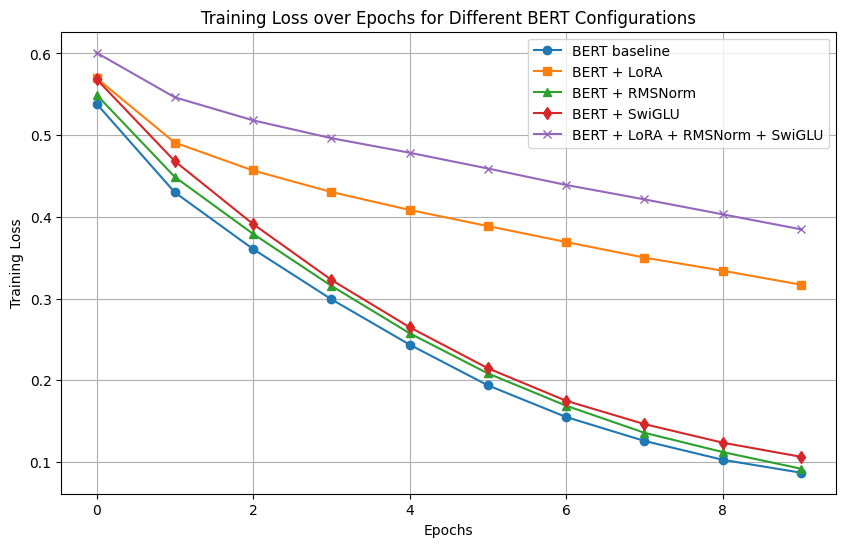

In [3]:
# Plotting the training loss for each model configuration
plt.figure(figsize=(10, 6))

plt.plot(epochs_0, train_loss_0, label='BERT baseline', marker='o')
plt.plot(epochs_1, train_loss_1, label='BERT + LoRA', marker='s')
plt.plot(epochs_2, train_loss_2, label='BERT + RMSNorm', marker='^')
plt.plot(epochs_3, train_loss_3, label='BERT + SwiGLU', marker='d')
plt.plot(epochs_4, train_loss_4, label='BERT + LoRA + RMSNorm + SwiGLU', marker='x')

plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs for Different BERT Configurations')
plt.legend()
plt.grid(True)
plt.show()

#### Sentiment accuracy

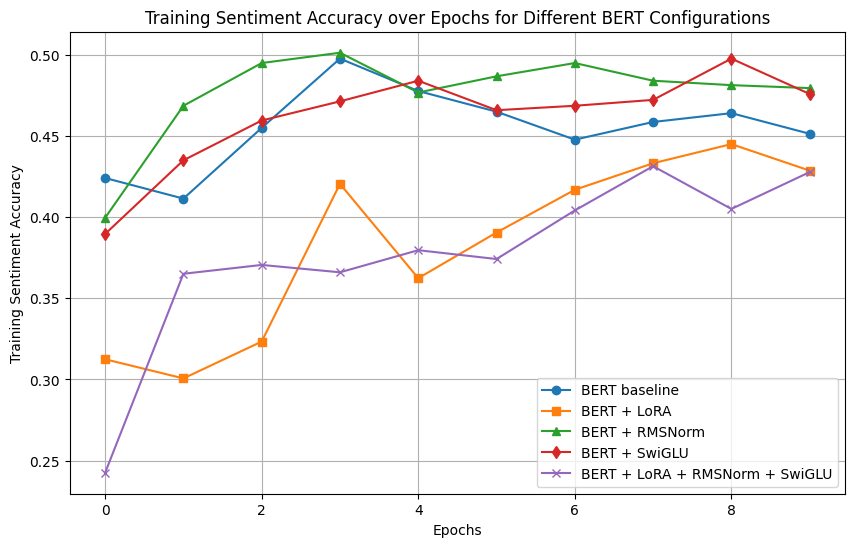

In [4]:
# Plotting the training sentiment accuracy for each model configuration
plt.figure(figsize=(10, 6))

plt.plot(epochs_0, train_sentiment_acc_0, label='BERT baseline', marker='o')
plt.plot(epochs_1, train_sentiment_acc_1, label='BERT + LoRA', marker='s')
plt.plot(epochs_2, train_sentiment_acc_2, label='BERT + RMSNorm', marker='^')
plt.plot(epochs_3, train_sentiment_acc_3, label='BERT + SwiGLU', marker='d')
plt.plot(epochs_4, train_sentiment_acc_4, label='BERT + LoRA + RMSNorm + SwiGLU', marker='x')

plt.xlabel('Epochs')
plt.ylabel('Training Sentiment Accuracy')
plt.title('Training Sentiment Accuracy over Epochs for Different BERT Configurations')
plt.legend()
plt.grid(True)
plt.show()

#### Paraphrase accuracy

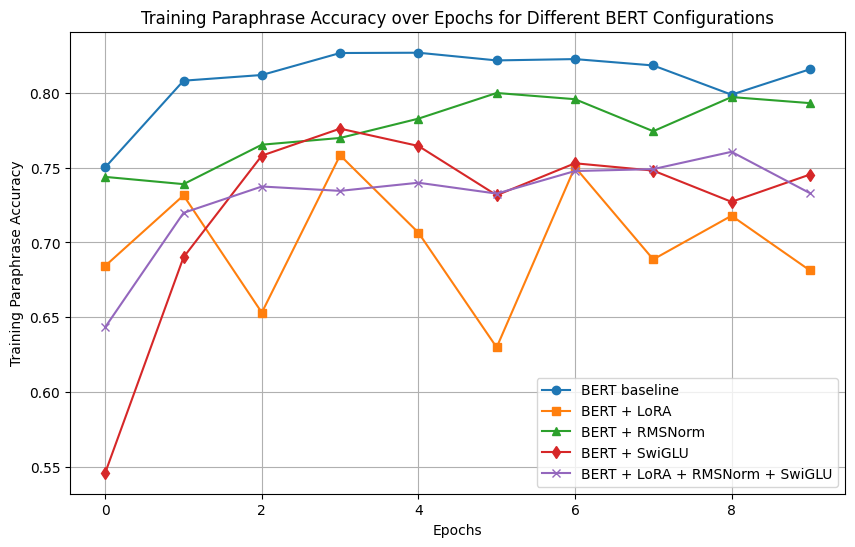

In [5]:
# Plotting the training paraphrase accuracy for each model configuration
plt.figure(figsize=(10, 6))

plt.plot(epochs_0, train_paraphrase_acc_0, label='BERT baseline', marker='o')
plt.plot(epochs_1, train_paraphrase_acc_1, label='BERT + LoRA', marker='s')
plt.plot(epochs_2, train_paraphrase_acc_2, label='BERT + RMSNorm', marker='^')
plt.plot(epochs_3, train_paraphrase_acc_3, label='BERT + SwiGLU', marker='d')
plt.plot(epochs_4, train_paraphrase_acc_4, label='BERT + LoRA + RMSNorm + SwiGLU', marker='x')

plt.xlabel('Epochs')
plt.ylabel('Training Paraphrase Accuracy')
plt.title('Training Paraphrase Accuracy over Epochs for Different BERT Configurations')
plt.legend()
plt.grid(True)
plt.show()

#### STS correlation

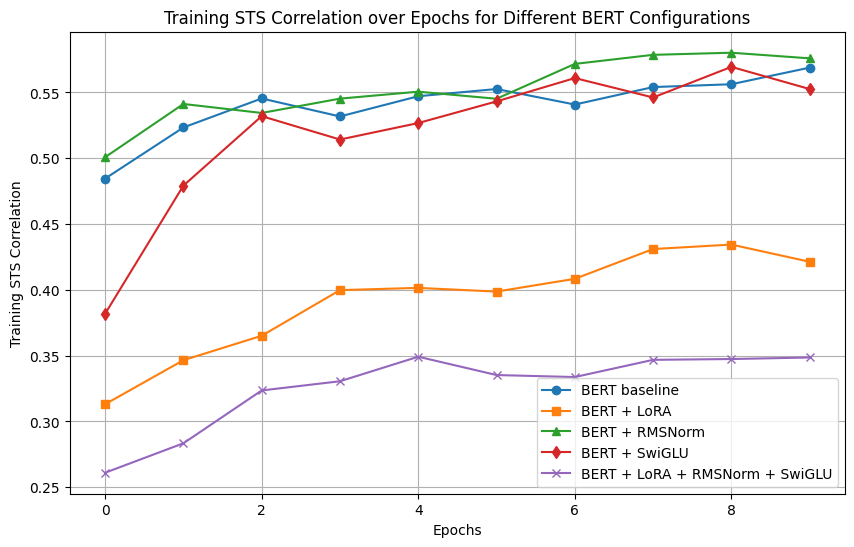

In [6]:
# Plotting the training STS correlation for each model configuration
plt.figure(figsize=(10, 6))

plt.plot(epochs_0, train_sts_corr_0, label='BERT baseline', marker='o')
plt.plot(epochs_1, train_sts_corr_1, label='BERT + LoRA', marker='s')
plt.plot(epochs_2, train_sts_corr_2, label='BERT + RMSNorm', marker='^')
plt.plot(epochs_3, train_sts_corr_3, label='BERT + SwiGLU', marker='d')
plt.plot(epochs_4, train_sts_corr_4, label='BERT + LoRA + RMSNorm + SwiGLU', marker='x')

plt.xlabel('Epochs')
plt.ylabel('Training STS Correlation')
plt.title('Training STS Correlation over Epochs for Different BERT Configurations')
plt.legend()
plt.grid(True)
plt.show()

#### Compare LoRA vs combined

In [8]:
LORA_FULL_PATH = "./stats/multitask-LoRA_saved_metrics.json"
COMBINED_FULL_PATH = "./stats/multitask-combined_saved_metrics_r64_alpha_256.json"

### BERT + LoRA 
epochs_5, train_loss_5, train_sentiment_acc_5, train_paraphrase_acc_5, train_sts_corr_5, train_avg_5, \
    test_sentiment_accuracy_5, test_paraphrase_accuracy_5, test_sts_corr_5 = load_data_multitask(LORA_FULL_PATH)


### BERT + LoRA + RMS + SwiGLU
epochs_6, train_loss_6, train_sentiment_acc_6, train_paraphrase_acc_6, train_sts_corr_6, train_avg_6, \
    test_sentiment_accuracy_6, test_paraphrase_accuracy_6, test_sts_corr_6 = load_data_multitask(COMBINED_FULL_PATH)

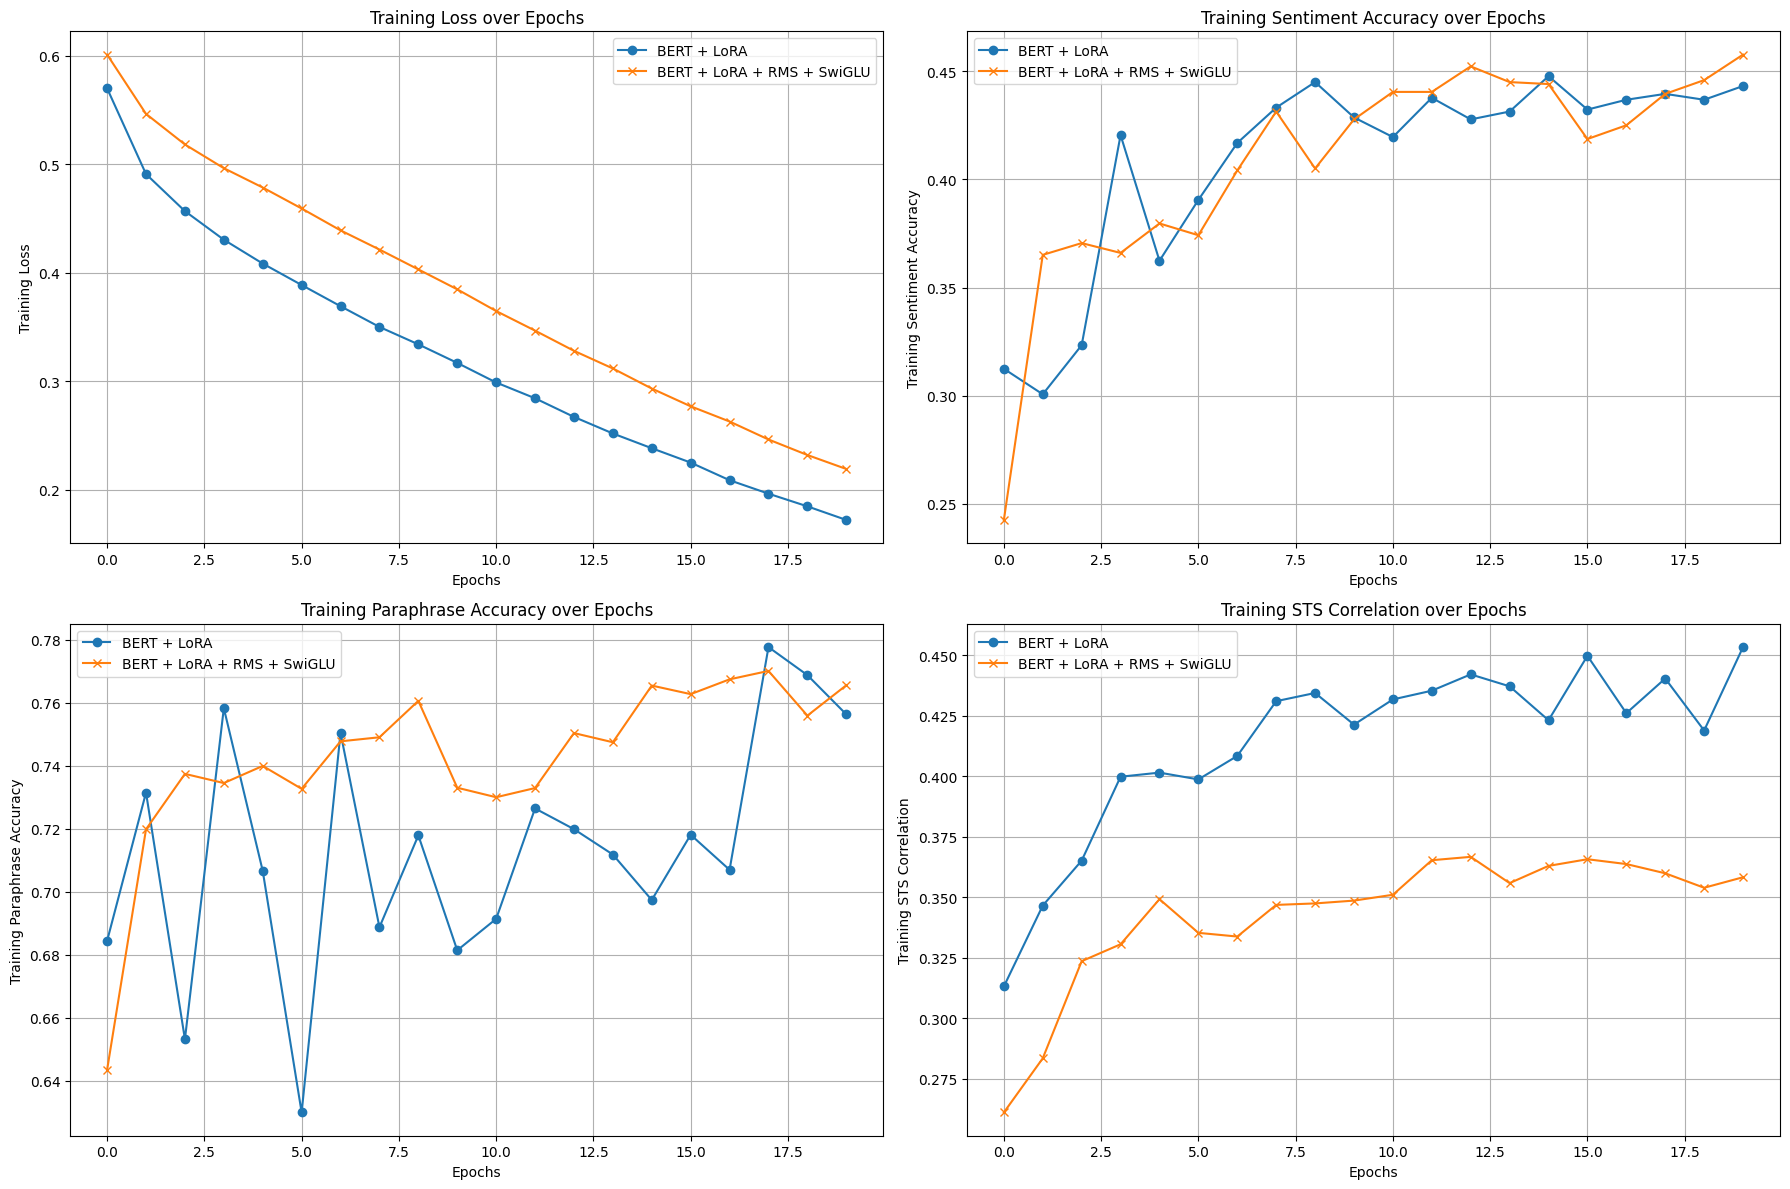

In [9]:
# Plotting metrics for BERT + LoRA and BERT + LoRA + RMS + SwiGLU
plt.figure(figsize=(18, 12))

# Plotting training loss
plt.subplot(2, 2, 1)
plt.plot(epochs_5, train_loss_5, label='BERT + LoRA', marker='o')
plt.plot(epochs_6, train_loss_6, label='BERT + LoRA + RMS + SwiGLU', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)

# Plotting training sentiment accuracy
plt.subplot(2, 2, 2)
plt.plot(epochs_5, train_sentiment_acc_5, label='BERT + LoRA', marker='o')
plt.plot(epochs_6, train_sentiment_acc_6, label='BERT + LoRA + RMS + SwiGLU', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Training Sentiment Accuracy')
plt.title('Training Sentiment Accuracy over Epochs')
plt.legend()
plt.grid(True)

# Plotting training paraphrase accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs_5, train_paraphrase_acc_5, label='BERT + LoRA', marker='o')
plt.plot(epochs_6, train_paraphrase_acc_6, label='BERT + LoRA + RMS + SwiGLU', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Training Paraphrase Accuracy')
plt.title('Training Paraphrase Accuracy over Epochs')
plt.legend()
plt.grid(True)

# Plotting training STS correlation
plt.subplot(2, 2, 4)
plt.plot(epochs_5, train_sts_corr_5, label='BERT + LoRA', marker='o')
plt.plot(epochs_6, train_sts_corr_6, label='BERT + LoRA + RMS + SwiGLU', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Training STS Correlation')
plt.title('Training STS Correlation over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()